# Import Packages

In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import time
import numpy as np

# Download Data

In [2]:
gdp = pd.read_csv("gdp_weights.csv")
state_id = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/GeoIDs%20-%20State.csv")
low_inc_small_biz_employment = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Low%20Inc%20Emp%20Small%20Businesses%20-%20State%20-%20Daily.csv")
small_biz_openings = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Womply%20Merchants%20-%20State%20-%20Daily.csv")
job_posting = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Burning%20Glass%20-%20State%20-%20Weekly.csv")
low_inc_small_biz_earnings = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Low%20Inc%20Earnings%20All%20Businesses%20-%20State%20-%20Daily.csv")
spending_data = pd.read_csv("https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Affinity%20-%20State%20-%20Daily.csv")
smal_biz_revenue =pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Womply%20Revenue%20-%20State%20-%20Daily.csv")

In [3]:
job_postings = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Burning%20Glass%20-%20National%20-%20Weekly.csv")


In [4]:
job_postings["date"] = job_postings['day_endofweek'].map(str) + '-' + job_postings['month'].map(str) + '-' + job_postings['year'].map(str)


In [5]:
job_postings.to_csv("covid_jobs.csv")

In [6]:
spending_data

,year,month,day,statefips,spend_acf,spend_aer,spend_all,spend_apg,spend_grf,spend_hcs,spend_tws,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle
0,2020,1,6,1,.,.,.,.,.,.,.,.,.,.
1,2020,1,6,2,.,.,.,.,.,.,.,.,.,.
2,2020,1,6,4,.,.,.,.,.,.,.,.,.,.
3,2020,1,6,5,.,.,.,.,.,.,.,.,.,.
4,2020,1,6,6,.,.,.,.,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,2020,7,19,51,-.331,-.482,-.062,-.0957,.103,-.0856,-.511,-.0923,.0282,-.0569
9992,2020,7,19,53,-.384,-.545,-.0494,-.101,.184,-.0538,-.521,-.0846,-.12,-.0121
9993,2020,7,19,54,-.203,-.372,-.00411,.0728,.103,-.0238,-.372,-.115,.000834,-.00618
9994,2020,7,19,55,-.357,-.458,-.0597,.0106,.154,-.169,-.484,-.0897,-.0705,-.0508


In [7]:
mobility = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Google%20Mobility%20-%20State%20-%20Daily.csv")
fips_code =pd.read_csv("https://gist.githubusercontent.com/dantonnoriega/bf1acd2290e15b91e6710b6fd3be0a53/raw/11d15233327c8080c9646c7e1f23052659db251d/us-state-ansi-fips.csv")    

# Merge Location Data

In [8]:
location = pd.merge(gdp[["State","GDP_Contribution","Region"]],
                  state_id[["statename","stateabbrev"]],
                  left_on = "State",
                  right_on ="statename",
                  how='left')
location = pd.merge(location,
                  fips_code,
                  left_on = "State",
                  right_on ="stname",
                  how='left')

location = location.rename(columns={" st": "FIPS"})



# Clean Up Small Biz Data

In [9]:
smal_biz_revenue["date"] = smal_biz_revenue['day'].map(str) + '-' + smal_biz_revenue['month'].map(str) + '-' + smal_biz_revenue['year'].map(str)
small_biz_openings["date"] = small_biz_openings['day'].map(str) + '-' + small_biz_openings['month'].map(str) + '-' + small_biz_openings['year'].map(str)

In [10]:
#reindex the series
small_biz_data = small_biz_openings[["merchants_all","statefips","date"]].copy()
small_biz_data["merchants_all"]= small_biz_data["merchants_all"]*100 
small_biz_data["merchants_all"]=small_biz_data["merchants_all"]+100

#reindex the series
smal_biz_revenue_data = smal_biz_revenue[["revenue_all","statefips","date"]].copy()
smal_biz_revenue_data["revenue_all"]= smal_biz_revenue_data["revenue_all"]*100
smal_biz_revenue_data["revenue_all"]=smal_biz_revenue_data["revenue_all"]+100

In [11]:
small_biz_combo = pd.merge(small_biz_data,
                  smal_biz_revenue_data,
                  left_on = ["statefips","date"],
                  right_on =["statefips","date"],
                  how='left')

# Clean up Mobility Data

In [12]:
mobility["date"] = mobility['day'].map(str) + '-' + mobility['month'].map(str) + '-' + mobility['year'].map(str)

In [13]:
#reindex the series
mobility_data = mobility[["gps_workplaces","statefips","date"]].copy()
mobility_data["gps_workplaces"]= mobility_data["gps_workplaces"]*100 
mobility_data["gps_workplaces"]=mobility_data["gps_workplaces"]+100

mobility_data["retail_rec"] = mobility[["gps_retail_and_recreation"]].copy()
mobility_data["retail_rec"]= mobility_data["retail_rec"]*100 
mobility_data["retail_rec"]=mobility_data["retail_rec"]+100

In [14]:
mobility.head()

,year,month,day,statefips,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,date
0,2020,2,24,1,0.00286,-0.00714,.0557,0.06000,0.01290,0.00857,-0.007980,24-2-2020
1,2020,2,24,2,0.03000,0.00714,.0629,0.03140,0.01570,0.00286,-0.000578,24-2-2020
2,2020,2,24,4,0.03140,0.00714,.0543,0.04000,0.00286,0.00429,-0.007510,24-2-2020
3,2020,2,24,5,0.02000,-0.00286,.0286,0.00429,0.01570,0.00143,-0.003010,24-2-2020
4,2020,2,24,6,0.01290,0.00286,.106,0.00714,0.01140,0.00143,-0.002500,24-2-2020


# Clean up Affinity Data

In [15]:
spending_data["date"] = spending_data['day'].map(str) + '-' + spending_data['month'].map(str) + '-' + spending_data['year'].map(str)

In [16]:
#reindex the series
spending = spending_data[["spend_all","statefips","date"]].copy()
spending['spend_all'] =spending.replace('.', np.nan)
spending['spend_all'] = pd.to_numeric(spending['spend_all'], errors='coerce')
#spending['spend_all'] = spending['spend_all'].astype(int)
spending["spend_all"]= spending["spend_all"]*100 
spending["spend_all"]=spending["spend_all"]+100

In [17]:
spending.head(800)

,spend_all,statefips,date
0,NaN,1,6-1-2020
1,NaN,2,6-1-2020
2,NaN,4,6-1-2020
3,NaN,5,6-1-2020
4,NaN,6,6-1-2020
...,...,...,...
795,101.430,34,21-1-2020
796,101.630,35,21-1-2020
797,101.200,36,21-1-2020
798,100.355,37,21-1-2020


# Merge all the Data

In [18]:
df1 = pd.merge(mobility_data,
                  spending,
                  left_on =["statefips","date"] ,
                  right_on =["statefips","date"],
                  how='left')

In [19]:
df2 = pd.merge(df1,
                  small_biz_combo,
                  left_on =["statefips","date"] ,
                  right_on =["statefips","date"],
                  how='left')

In [20]:
df3 = pd.merge(df2,
                  location,
                  left_on =["statefips"] ,
                  right_on =["FIPS"],
                  how='left')

In [21]:
#df3 = df3.dropna()

In [22]:
df4 = df3[["date","State","GDP_Contribution","merchants_all","revenue_all","spend_all","gps_workplaces","retail_rec","Region"]].copy()

In [23]:
df4

,date,State,GDP_Contribution,merchants_all,revenue_all,spend_all,gps_workplaces,retail_rec,Region
0,24-2-2020,Alabama,0.011,99.9613,100.516,97.730,101.290,100.286,Southeast
1,24-2-2020,Alaska,0.003,99.2110,99.305,99.166,101.570,103.000,Far West
2,24-2-2020,Arizona,0.017,103.3700,104.760,104.310,100.286,103.140,Southwest
3,24-2-2020,Arkansas,0.006,102.7100,96.790,100.653,101.570,102.000,Southeast
4,24-2-2020,California,0.146,100.7160,100.490,102.330,101.140,101.290,Far West
...,...,...,...,...,...,...,...,...,...
7798,25-7-2020,Virginia,0.026,NaN,NaN,NaN,67.100,86.000,Southeast
7799,25-7-2020,Washington,0.028,NaN,NaN,NaN,65.000,86.300,Far West
7800,25-7-2020,West Virginia,0.004,NaN,NaN,NaN,75.400,94.000,Southeast
7801,25-7-2020,Wisconsin,0.016,NaN,NaN,NaN,75.700,95.430,Great Lakes


# US Weighted by GDP

In [24]:
#Create the components to be summed
df4["merchant_ag"]= df4["merchants_all"]*df4["GDP_Contribution"]
df4["revenue_ag"]= df4["revenue_all"]*df4["GDP_Contribution"]
df4["spend_ag"]= df4["spend_all"]*df4["GDP_Contribution"]
df4["Workplace Mobility"]= df4["gps_workplaces"]*df4["GDP_Contribution"]
df4["retail_rec_ag"]= df4["retail_rec"]*df4["GDP_Contribution"]

In [25]:
df4

,date,State,GDP_Contribution,merchants_all,revenue_all,spend_all,gps_workplaces,retail_rec,Region,merchant_ag,revenue_ag,spend_ag,Workplace Mobility,retail_rec_ag
0,24-2-2020,Alabama,0.011,99.9613,100.516,97.730,101.290,100.286,Southeast,1.099574,1.105676,1.075030,1.114190,1.103146
1,24-2-2020,Alaska,0.003,99.2110,99.305,99.166,101.570,103.000,Far West,0.297633,0.297915,0.297498,0.304710,0.309000
2,24-2-2020,Arizona,0.017,103.3700,104.760,104.310,100.286,103.140,Southwest,1.757290,1.780920,1.773270,1.704862,1.753380
3,24-2-2020,Arkansas,0.006,102.7100,96.790,100.653,101.570,102.000,Southeast,0.616260,0.580740,0.603918,0.609420,0.612000
4,24-2-2020,California,0.146,100.7160,100.490,102.330,101.140,101.290,Far West,14.704536,14.671540,14.940180,14.766440,14.788340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,25-7-2020,Virginia,0.026,NaN,NaN,NaN,67.100,86.000,Southeast,NaN,NaN,NaN,1.744600,2.236000
7799,25-7-2020,Washington,0.028,NaN,NaN,NaN,65.000,86.300,Far West,NaN,NaN,NaN,1.820000,2.416400
7800,25-7-2020,West Virginia,0.004,NaN,NaN,NaN,75.400,94.000,Southeast,NaN,NaN,NaN,0.301600,0.376000
7801,25-7-2020,Wisconsin,0.016,NaN,NaN,NaN,75.700,95.430,Great Lakes,NaN,NaN,NaN,1.211200,1.526880


In [26]:
dfz= df4.copy()
dfz["Date"]=dfz["date"]
dfz['date'] =  pd.to_datetime(dfz['date'], format='%d-%m-%Y')
dfz = dfz.set_index('date')

In [27]:
df5 = pd.DataFrame(dfz.groupby('date')["Workplace Mobility"].sum())
df5["Credit Card Spend"] = pd.DataFrame(dfz.groupby('date')["spend_ag"].sum())
df5["Store Revenue"] = pd.DataFrame(dfz.groupby('date')["revenue_ag"].sum())
df5["Open Stores"] = pd.DataFrame(dfz.groupby('date')["merchant_ag"].sum())
df5["Retail and Recreation Mobility"] = pd.DataFrame(dfz.groupby('date')["retail_rec_ag"].sum())

In [28]:
df5

,Workplace Mobility,Credit Card Spend,Store Revenue,Open Stores,Retail and Recreation Mobility
date,,,,,
2020-02-24,99.356806,97.922455,97.788665,99.690047,100.846537
2020-02-25,99.748458,97.111184,97.346869,99.430308,101.340979
2020-02-26,99.969024,97.235589,99.167009,99.047168,102.051989
2020-02-27,100.234501,96.497057,98.007006,98.560421,102.854530
2020-02-28,100.592815,95.541904,100.211071,98.574906,103.590690
...,...,...,...,...,...
2020-07-21,67.111900,0.000000,0.000000,0.000000,82.697888
2020-07-22,67.126000,0.000000,0.000000,0.000000,82.488869
2020-07-23,67.164000,0.000000,0.000000,0.000000,82.435486


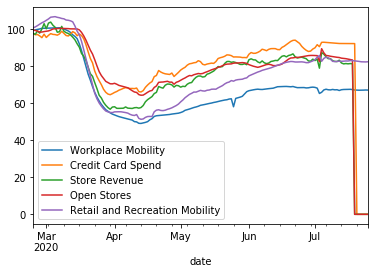

In [29]:
df6= df5[["Workplace Mobility","Credit Card Spend","Store Revenue","Open Stores","Retail and Recreation Mobility"]].copy()
df6.plot()

# Regional Weight

In [30]:
#set to only get unique values
S_east = df4['Region'] == "Southeast"
F_west = df4['Region'] == "Far West"
S_west = df4['Region'] == "Southwest"
M_east = df4['Region'] == "Mideast"
G_Lakes = df4['Region'] == "Great Lakes"
Plains = df4['Region'] == "Plains"
N_Eng = df4['Region'] == "New England"
R_Mountain = df4['Region'] == "Rocky Mountain"

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


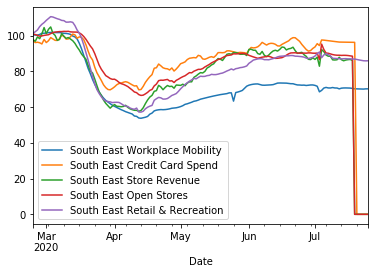

In [31]:
#dataframe for region
df_SE = df4[S_east]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["South East Workplace Mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]
df_SE1["South East Retail & Recreation"]= df_SE1["retail_rec"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['South East Workplace Mobility'].sum())
df_SE2["South East Credit Card Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["South East Store Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["South East Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())
df_SE2["South East Retail & Recreation"] = pd.DataFrame(df_SE1.groupby('Date')['South East Retail & Recreation'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df6, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


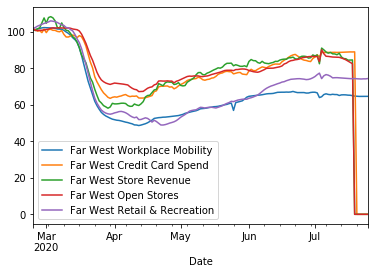

In [32]:
#dataframe for region
df_SE = df4[F_west]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["Far West Workplace Mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]
df_SE1["South East Retail & Recreation"]= df_SE1["retail_rec"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['Far West Workplace Mobility'].sum())
df_SE2["Far West Credit Card Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Far West Store Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Far West Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())
df_SE2["Far West Retail & Recreation"] = pd.DataFrame(df_SE1.groupby('Date')["South East Retail & Recreation"].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


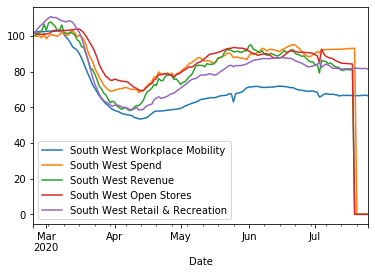

In [33]:
#dataframe for region
df_SE = df4[S_west]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["South West Workplace Mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]
df_SE1["South East Retail & Recreation"]= df_SE1["retail_rec"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['South West Workplace Mobility'].sum())
df_SE2["South West Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["South West Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["South West Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())
df_SE2["South West Retail & Recreation"] = pd.DataFrame(df_SE1.groupby('Date')['South East Retail & Recreation'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

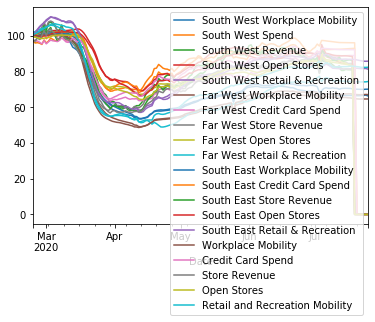

In [34]:
df_Master.plot()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


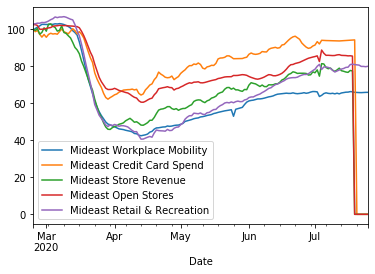

In [35]:
#dataframe for region
df_SE = df4[M_east]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["Mideast Workplace Mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]
df_SE1["South East Retail & Recreation"]= df_SE1["retail_rec"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['Mideast Workplace Mobility'].sum())
df_SE2["Mideast Credit Card Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Mideast Store Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Mideast Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())
df_SE2["Mideast Retail & Recreation"] = pd.DataFrame(df_SE1.groupby('Date')['South East Retail & Recreation'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


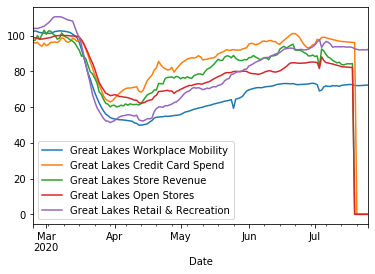

In [36]:
#dataframe for region
df_SE = df4[G_Lakes]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["Great Lakes Workplace Mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]
df_SE1["South East Retail & Recreation"]= df_SE1["retail_rec"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['Great Lakes Workplace Mobility'].sum())
df_SE2["Great Lakes Credit Card Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Great Lakes Store Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Great Lakes Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())
df_SE2["Great Lakes Retail & Recreation"] = pd.DataFrame(df_SE1.groupby('Date')['South East Retail & Recreation'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


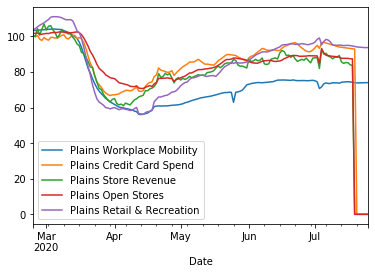

In [37]:
#dataframe for region
df_SE = df4[Plains]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["Plains Workplace Mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]
df_SE1["South East Retail & Recreation"]= df_SE1["retail_rec"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['Plains Workplace Mobility'].sum())
df_SE2["Plains Credit Card Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Plains Store Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Plains Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())
df_SE2["Plains Retail & Recreation"] = pd.DataFrame(df_SE1.groupby('Date')['South East Retail & Recreation'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


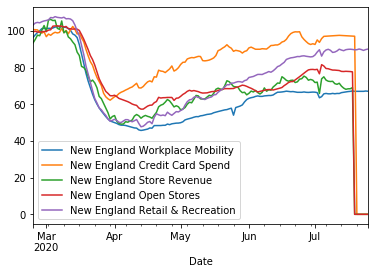

In [38]:
#dataframe for region
df_SE = df4[N_Eng]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["New England Workplace Mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]
df_SE1["South East Retail & Recreation"]= df_SE1["retail_rec"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['New England Workplace Mobility'].sum())
df_SE2["New England Credit Card Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["New England Store Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["New England Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())
df_SE2["New England Retail & Recreation"] = pd.DataFrame(df_SE1.groupby('Date')['South East Retail & Recreation'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


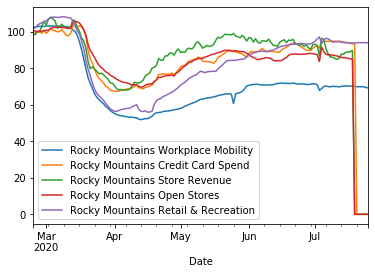

In [39]:
#dataframe for region
df_SE = df4[R_Mountain]

#convert the date to datetime
df_SE['Date'] =  pd.to_datetime(df_SE['date'], format='%d-%m-%Y')
df_SE = df_SE.set_index('Date')

#work out sum of gdp contribution for regions
df_SE1 = pd.DataFrame(df_SE.groupby('date', as_index=False)['GDP_Contribution'].sum())


#convert date to datetime
df_SE1['Date'] =  pd.to_datetime(df_SE1['date'], format='%d-%m-%Y')
df_SE1 = df_SE1.set_index('Date')

#merge data
df_SE1 = df_SE1.merge(df_SE, left_index=True, right_index=True)

#calculate the weight for each state
df_SE1["regional_weight"] = df_SE1['GDP_Contribution_y']/df_SE1['GDP_Contribution_x']

#use the above to create the regional input for each state
df_SE1["Rocky Mountains Workplace Mobility"]= df_SE1["gps_workplaces"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_spend_all"]= df_SE1["spend_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_revenue_all"]= df_SE1["revenue_all"]*df_SE1["regional_weight"]
df_SE1["regionally_weighted_merchants_all"]= df_SE1["merchants_all"]*df_SE1["regional_weight"]
df_SE1["South East Retail & Recreation"]= df_SE1["retail_rec"]*df_SE1["regional_weight"]

#sum weighted components
df_SE2 = pd.DataFrame(df_SE1.groupby('Date')['Rocky Mountains Workplace Mobility'].sum())
df_SE2["Rocky Mountains Credit Card Spend"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_spend_all'].sum())
df_SE2["Rocky Mountains Store Revenue"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_revenue_all'].sum())
df_SE2["Rocky Mountains Open Stores"] = pd.DataFrame(df_SE1.groupby('Date')['regionally_weighted_merchants_all'].sum())
df_SE2["Rocky Mountains Retail & Recreation"] = pd.DataFrame(df_SE1.groupby('Date')['South East Retail & Recreation'].sum())

#plot to check it works
df_SE2.plot()

#merge data
df_Master = df_SE2.merge(df_Master, left_index=True, right_index=True)

In [40]:
df_done = df_Master.copy()
import numpy as np
df_done[df_done.eq(0)] = np.nan

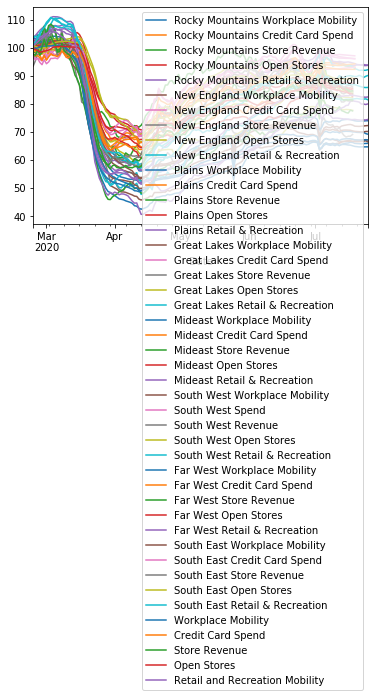

In [41]:
df_done.plot()

In [42]:
df_done.to_csv("covid_data.csv")